# 1. Tensor
# 2. Operations
# 3. Gradients
# 4. Autograds
# 5. Loader 
# 6. Model
# 7. Train / Eval

## 1. Tensor
* torch.Tensor
* torch.FloatTensor
* torch.DoubleTensor
* torch.LongTensor

In [1]:
import torch  ##tensor라는 자료형으로 변환해서 사용  #메모리상 효율적으로 사용하기 위해 tensor중에서도 정수,이진수 등으로 구분 
import torch.nn as nn  #neural network
import torch.nn.functional as F

In [37]:
x = torch.empty(3,4)  #빈 tensor를 만들고 값은 나중에 채우겠다 
print('Empty tensor: '); print(x, '\n')

y = torch.randn(2,3,4)  #normal분포를 따르는 값들로 랜덤하게 채움 #3차원 tensor 주로 쓰임! #3X4 행렬이 2개 묶임 
print('Random normal tensor: '); print(y)

Empty tensor: 
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  9.8091e-45,  9.9078e+10,  4.5909e-41],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]) 

Random normal tensor: 
tensor([[[-0.3960, -0.4142, -1.7134, -0.5718],
         [-0.7393, -1.0476, -1.0136, -1.3430],
         [ 1.5736, -0.4638,  0.3389, -0.4569]],

        [[-1.2518,  1.1386,  0.5353,  1.8298],
         [ 0.4936,  2.1390, -1.4278,  0.8832],
         [-0.4280,  0.5935, -0.6844, -0.5972]]])


In [38]:
torch.LongTensor(y) #정수형으로 변환 불가 

TypeError: expected torch.LongTensor (got torch.FloatTensor)

In [39]:
print(torch.FloatTensor(y), '\n') #변환 
print(y.float())  #같은 의미

tensor([[[-0.3960, -0.4142, -1.7134, -0.5718],
         [-0.7393, -1.0476, -1.0136, -1.3430],
         [ 1.5736, -0.4638,  0.3389, -0.4569]],

        [[-1.2518,  1.1386,  0.5353,  1.8298],
         [ 0.4936,  2.1390, -1.4278,  0.8832],
         [-0.4280,  0.5935, -0.6844, -0.5972]]]) 

tensor([[[-0.3960, -0.4142, -1.7134, -0.5718],
         [-0.7393, -1.0476, -1.0136, -1.3430],
         [ 1.5736, -0.4638,  0.3389, -0.4569]],

        [[-1.2518,  1.1386,  0.5353,  1.8298],
         [ 0.4936,  2.1390, -1.4278,  0.8832],
         [-0.4280,  0.5935, -0.6844, -0.5972]]])


## 2. Operations: 자주 쓰이는 연산 기능
* torch.mm
* torch.bmm
* torch.cat
* torch.Tensor.permute
* torch.Tensor.view
* torch.Tensor.squeeze

In [40]:
x = torch.rand(3,4) #3X4행렬 
y = torch.rand(4,5)
z = torch.mm(x, y)  #행렬 곱 matrix multiplication
print('x * y: '); print(z, '\n')
print(z.shape)  #당연히 3X5행렬 shape으로 확인 가능 

x * y: 
tensor([[ 1.9186,  1.3884,  1.3642,  0.9533,  1.8304],
        [ 0.9670,  0.5930,  0.8395,  0.3841,  0.9184],
        [ 1.3316,  0.8736,  1.1954,  0.5413,  1.2205]]) 

torch.Size([3, 5])


In [41]:
x = torch.rand(16, 3, 4)
y = torch.rand(16, 4, 5)
z = torch.bmm(x, y)  #16이라는 인자를 batch로 인식하고 뒤에 두 차원만 행렬곱을 하겠다
print(z.shape)

torch.Size([16, 3, 5])


In [42]:
x = torch.rand(16, 3, 4)
y = torch.rand(16, 3, 5)
z = torch.cat([x, y], 2)  #많이 쓰임 #tensor 2개를 이어붙힌다 #다시
print(z.shape)

torch.Size([16, 3, 9])


In [43]:
z_201 = z.permute(2, 0, 1)  #차원순서를 뒤바꿈 16 3 9 를 2 0 1차원 자리로 가라 
print('Permuted dim (2)x(0)x(1): '); print(z_201.shape, '\n')

z_120 = z.permute(1, 2, 0)
print('Permuted dim (1)x(2)x(0): '); print(z_120.shape)

Permuted dim (2)x(0)x(1): 
torch.Size([9, 16, 3]) 

Permuted dim (1)x(2)x(0): 
torch.Size([3, 9, 16])


In [48]:
z1 = z.view(4, 12, 9)  #16 3 9를 4 12 9로 바꾼다 
print('View(4, 12, 9): '); print(z1.shape, '\n')

z2 = z.view(4, -1, 9)  #첫번째는 4 세번째는 9 남는 차원은 알아서 가운데 넣어줘라 : -1
print('View(4, -1, 9): '); print(z2.shape, '\n')

z3 = z.view(-1, 9)
print('View(-1, 9): '); print(z3.shape, '\n')

z4 = z.view(-1)  #그냥 일차원 tensor로 바꿔라 
print('View(-1): '); print(z4.shape)

View(4, 12, 9): 
torch.Size([4, 12, 9]) 

View(4, -1, 9): 
torch.Size([4, 12, 9]) 

View(-1, 9): 
torch.Size([48, 9]) 

View(-1): 
torch.Size([432])


In [50]:
x = torch.randn(10, 1, 2, 1, 5)
y = x.squeeze()  #차원에서 쓸데없는 부분 버린다 #1인 차원 다 지워짐 
print('Squeeze all: '); print(y.shape, '\n')

z = x.squeeze(3) #4번째 차원만 지우겠다 #해당 라이브러리가 제공하는 document보는 습관! 
print('Squeeze dim (3): '); print(z.shape)

Squeeze all: 
torch.Size([10, 2, 5]) 

Squeeze dim (3): 
torch.Size([10, 1, 2, 5])


## 3. Gradients
## 4. Autograds

-- 텐서의 속성 중 하나인 **.requires_grad**를 **True**로 세팅하면, 텐서의 모든 연산에 대해 추적을 시작한다.

-- 계산 작업이 모두 수행됐다면 **.backward()** 를 호출하여 모든 그라디언트들을 자동으로 계산할 수 있다.

-- 이 텐서를 위한 그라디언트는 **.grad** 속성에 누적되어 저장된다.

-- 텐서에 대해 기록(history) 추적을 중지하려면 **.detach()** 를 호출해 현재의 계산 기록으로부터 분리시키고 이후에 일어나는 계산들은 추적되지 않게 할 수 있다.

-- 만약 도함수(derivatives)들을 계산하고 싶다면, Tensor의 **.backward()** 를 호출하면 된다. 만약 **Tensor**가 스칼라 형태라면, **backward()** 사용에 있어 그 어떠한 파라미터도 필요하지 않는다. 그러나 한 개 이상의 요소를 가지고 있다면 올바른 모양(matching shape)의 텐서인 **gradient** 파라미터를 명시할 필요가 있다.

In [76]:
x = torch.ones((3,2,2), requires_grad=True) #모든 데이터값을 1로! #requires_grad gradient가 흐르는 tensor로 만들어라 
x.requires_grad_(True)

y = x+2
print(y, '\n')
print('Does y have a gradient?:', y.requires_grad) #gradient가 똑같이 흐름 
print(y.grad_fn)

tensor([[[ 3.,  3.],
         [ 3.,  3.]],

        [[ 3.,  3.],
         [ 3.,  3.]],

        [[ 3.,  3.],
         [ 3.,  3.]]]) 

Does y have a gradient?: True


In [77]:
z = 2*y
z.sum().backward()  #여태까지 있었던 모든 연산과정 tensor의 편미분 #?
print(x.grad)  #편미분한 값 

tensor([[[ 2.,  2.],
         [ 2.,  2.]],

        [[ 2.,  2.],
         [ 2.,  2.]],

        [[ 2.,  2.],
         [ 2.,  2.]]])


CIFAR-10 데이터셋을 이용할 것이다. 해당 데이터셋은 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭 순서의 클래스들을 가지고 있다. CIFAR-10의 이미지들은 3 * 32 * 32인데 다시 말해 32 * 32 픽셀 크기의 3채널 컬러 이미지이다.
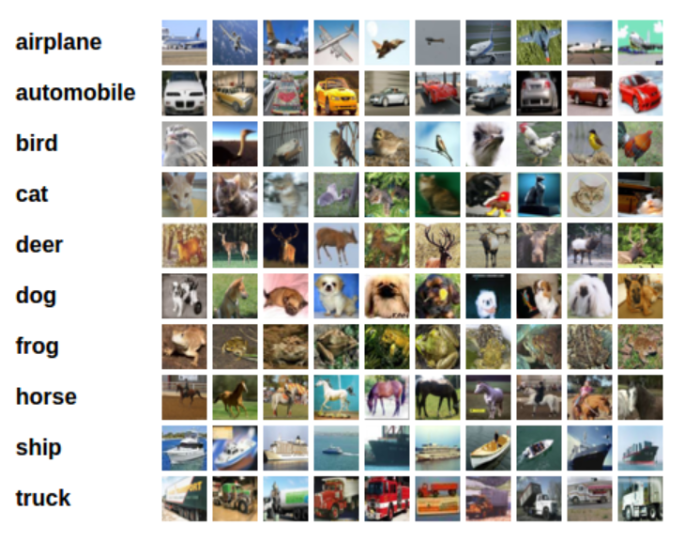

## 5. Loader

In [1]:
import torchvision
import torchvision.transforms as transforms

# 불러온 이미지 선처리 하기 위한 단계 (ToTensor : 이미지를 텐서 형태로)
# Tensor의 range는 0에서 1로
# 채널에 변화를 줌(?)
# CenterCrop : 이미지 가운데 부분만 잘라서 사용하겠다
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
# 이미지 전처리를 위한 transforms.Compose
# PIL image (H x W x C) -> Tensor (C x H x W)

trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)

Files already downloaded and verified


In [2]:
from torch.utils.data import DataLoader

trainloader = DataLoader(trainset, 
                         batch_size=4, #batchsize 4개 지정해서 12500개의 데이터를 불러오겠다 
                         shuffle=True, 
                         drop_last=False)

testloader = DataLoader(testset, 
                        batch_size=4,
                        shuffle=False,
                        drop_last=False)
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

In [3]:
trainiter = iter(trainloader) #한 batch만 뽑아서 확인해보기 
images, labels = trainiter.next() #batch size 4 로 지정한 shape확인 가능 

print(len(trainloader))
print(images.shape)
print(labels) #1차원 tensor인데 length 가 4인! 

12500
torch.Size([4, 3, 32, 32])
tensor([8, 5, 0, 4])


## 6. Model

In [1]:
src = {'input_size':3*32*32,   #config #환경설정 #들어가야하는 input들 한번에 묶어놓은 것 
       'hidden_size1':256,
       'hidden_size2':128,
       'hidden_size3':64,
       'output_size':10,
       'init_weight_range':0.5,
       'num_epochs':15,
       'batch_size':4,
       'learning_rate':1e-3}

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class TobigsNet(nn.Module):
    def __init__(self, src):
        super(TobigsNet, self).__init__()
        self.fc1 = nn.Linear(src['input_size'], src['hidden_size1']) #인자:input값의 개수 , output값의 개수  #층을 하나 만드는 것!
        self.fc2 = nn.Linear(src['hidden_size1'], src['hidden_size2'])
        self.fc3 = nn.Linear(src['hidden_size2'], src['hidden_size3'])
        self.fc4 = nn.Linear(src['hidden_size3'], src['output_size']) #최종 length가 10인 tensor가 나옴
                             
        ## sequential layer
        self.seq_fc = nn.Sequential(
                            nn.Linear(src['input_size'], src['hidden_size1']),
                            nn.Linear(src['hidden_size1'], src['hidden_size2']),
                            nn.Linear(src['hidden_size2'], src['hidden_size3']),
                            nn.Linear(src['hidden_size3'], src['output_size'])
                            )   #하나의 layer로 묶음  #위랑 결과 같음!
        
        self.init_range = src['init_weight_range']
        
    def init_weight(self):
        self.fc1.weight.data.uniform_(-self.init_range, self.init_range) #가중치 초기화 
        self.fc2.weight.data.uniform_(-self.init_range, self.init_range)
        self.fc3.weight.data.uniform_(-self.init_range, self.init_range)
        self.fc4.weight.data.uniform_(-self.init_range, self.init_range)
        
        for fc in self.seq_fc:
            fc.weight.data.uniform_(-self.init_range, self.init_range)
        
    def forward(self, img): #layer가 4개 
        x = img.view(img.shape[0], -1) #image shape 4*3*32*32 중 4차원만 유지하고 나머지는 한 차원으로 묶어버리겠다
        #--------------------
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        y = self.fc4(x)
        #--------------------
        
        ## 4 lines above are identical to #sequencial로 써도 위와 같은 모델 
#         y = self.seq_fc(x)

        return y #마지막 y는 length10짜리 tensor

In [7]:
model = TobigsNet(src) #init하는 부분 #준비물들 준비 
y = model(images) #forward부분 

In [7]:
print(y.shape) 

torch.Size([4, 10])


## 7. Train / Eval

### 손실 함수 및 optimizer 정의

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  #loss
optimizer = optim.SGD(model.parameters(), #gradient를 어떤 방식으로 할건지 
                      src['learning_rate'], 
                      momentum=0.9)

### 네트워크 학습
단순히 데이터를 반복시켜 네트워크와 optimizer의 입력으로 넘겨주기만 하면 된다.

In [10]:
from tqdm import tqdm  #빨간줄 

model.init_weight()

for epoch in tqdm(range(src['num_epochs'])):   #epoch 5번 
    current_loss = 0.0
#     model.train(True)
    
    for i, data in enumerate(trainloader): #4개씩 묶여있는 사진들이 루프 한번만에!
        # get the inputs
        inputs, labels = data  #image에 사진이랑 클래스 있음 
        
        # zero the parameter gradients
        optimizer.zero_grad()  #0으로 초기화 
        
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels) #실제 사진과 확률의 차이
        loss.backward()  #편미분 값들 계산
        optimizer.step()  #계산한 값들로 update
        
        # print statistics
        step = i + 1
        current_loss += loss.item()
        
        if step % 1000 == 0 and step != 0:     # print every 1000 mini-batches
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' %
                  (epoch + 1, src['num_epochs'], step, len(trainloader)//1000 * 1000, current_loss / 1000)) #누적합의 평균 
            current_loss = 0.0  #12500개의 데이터 --> 1000번씩 찍으면 500이 남으므로 다음 epoch로 넘어가 loss가 

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Epoch [1/5], Step [1000/12000], Loss: 2.0102
Epoch [1/5], Step [2000/12000], Loss: 1.8985
Epoch [1/5], Step [3000/12000], Loss: 1.8437
Epoch [1/5], Step [4000/12000], Loss: 1.8351
Epoch [1/5], Step [5000/12000], Loss: 1.8081
Epoch [1/5], Step [6000/12000], Loss: 1.8050
Epoch [1/5], Step [7000/12000], Loss: 1.8156
Epoch [1/5], Step [8000/12000], Loss: 1.7893
Epoch [1/5], Step [9000/12000], Loss: 1.8220
Epoch [1/5], Step [10000/12000], Loss: 1.7719
Epoch [1/5], Step [11000/12000], Loss: 1.7693
Epoch [1/5], Step [12000/12000], Loss: 1.7997


 20%|████████████████▊                                                                   | 1/5 [01:34<06:16, 94.11s/it]

Epoch [2/5], Step [1000/12000], Loss: 1.7933
Epoch [2/5], Step [2000/12000], Loss: 1.7645
Epoch [2/5], Step [3000/12000], Loss: 1.7615
Epoch [2/5], Step [4000/12000], Loss: 1.7778
Epoch [2/5], Step [5000/12000], Loss: 1.7552
Epoch [2/5], Step [6000/12000], Loss: 1.7428
Epoch [2/5], Step [7000/12000], Loss: 1.7483
Epoch [2/5], Step [8000/12000], Loss: 1.7763
Epoch [2/5], Step [9000/12000], Loss: 1.7704
Epoch [2/5], Step [10000/12000], Loss: 1.7611
Epoch [2/5], Step [11000/12000], Loss: 1.7959
Epoch [2/5], Step [12000/12000], Loss: 1.7385


 40%|█████████████████████████████████▌                                                  | 2/5 [02:47<04:11, 83.84s/it]

Epoch [3/5], Step [1000/12000], Loss: 1.7621
Epoch [3/5], Step [2000/12000], Loss: 1.7346
Epoch [3/5], Step [3000/12000], Loss: 1.7585
Epoch [3/5], Step [4000/12000], Loss: 1.7521
Epoch [3/5], Step [5000/12000], Loss: 1.7435
Epoch [3/5], Step [6000/12000], Loss: 1.7698
Epoch [3/5], Step [7000/12000], Loss: 1.7477
Epoch [3/5], Step [8000/12000], Loss: 1.7748
Epoch [3/5], Step [9000/12000], Loss: 1.7122
Epoch [3/5], Step [10000/12000], Loss: 1.7361
Epoch [3/5], Step [11000/12000], Loss: 1.7461
Epoch [3/5], Step [12000/12000], Loss: 1.7197


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [04:02<02:41, 80.80s/it]

Epoch [4/5], Step [1000/12000], Loss: 1.7204
Epoch [4/5], Step [2000/12000], Loss: 1.7227
Epoch [4/5], Step [3000/12000], Loss: 1.7474
Epoch [4/5], Step [4000/12000], Loss: 1.7634
Epoch [4/5], Step [5000/12000], Loss: 1.7165
Epoch [4/5], Step [6000/12000], Loss: 1.7256
Epoch [4/5], Step [7000/12000], Loss: 1.7240
Epoch [4/5], Step [8000/12000], Loss: 1.7651
Epoch [4/5], Step [9000/12000], Loss: 1.7283
Epoch [4/5], Step [10000/12000], Loss: 1.7096
Epoch [4/5], Step [11000/12000], Loss: 1.7491
Epoch [4/5], Step [12000/12000], Loss: 1.7371


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [05:16<01:19, 79.23s/it]

Epoch [5/5], Step [1000/12000], Loss: 1.7107
Epoch [5/5], Step [2000/12000], Loss: 1.7227
Epoch [5/5], Step [3000/12000], Loss: 1.7153
Epoch [5/5], Step [4000/12000], Loss: 1.7503
Epoch [5/5], Step [5000/12000], Loss: 1.7437
Epoch [5/5], Step [6000/12000], Loss: 1.6977
Epoch [5/5], Step [7000/12000], Loss: 1.7096
Epoch [5/5], Step [8000/12000], Loss: 1.7534
Epoch [5/5], Step [9000/12000], Loss: 1.7255
Epoch [5/5], Step [10000/12000], Loss: 1.7467
Epoch [5/5], Step [11000/12000], Loss: 1.7256
Epoch [5/5], Step [12000/12000], Loss: 1.7514


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [06:48<00:00, 81.73s/it]


### 평가 데이터를 이용한 네트워크 평가
학습 데이터셋을 이용해 총 5번 반복하면서 학습을 시켰다. 그러나 실제로 네트워크가 무엇인가를 배웠는지에 대하여 테스트를 해야한다.

뉴럴 네트워크의 출력인 클래스 label을 예측하고 실제 데이터와 비교함으로써 테스트를 수행할 수 있는데 만약 예측 결과가 올바르다면 올바른 예측 리스트에 샘플을 추가할 수 있다.

In [18]:
# Test the Model
correct = 0
total = 0
for i, data in enumerate(testloader):
    inputs, labels = data
#     images = images.view(-1, 28*28)
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.shape[0]
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 2500 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 2500 test images: 38 %


## 8. 번외
* Convolution Neural Network로 더 잘 분류해보자

In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [12]:
cnn_model = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

### Train

In [13]:
from tqdm import tqdm

for epoch in tqdm(range(src['num_epochs'])):
    current_loss = 0.0
#     model.train(True)
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        step = i + 1
        current_loss += loss.item()
        
        if step % 1000 == 0 and step != 0:     # print every 1000 mini-batches
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' %
                  (epoch + 1, src['num_epochs'], step, len(trainloader)//1000 * 1000, current_loss / 1000))
            current_loss = 0.0
            
print('Finished Training')

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Epoch [1/5], Step [1000/12000], Loss: 2.2986
Epoch [1/5], Step [2000/12000], Loss: 2.1548
Epoch [1/5], Step [3000/12000], Loss: 1.9402
Epoch [1/5], Step [4000/12000], Loss: 1.8583
Epoch [1/5], Step [5000/12000], Loss: 1.6941
Epoch [1/5], Step [6000/12000], Loss: 1.6560
Epoch [1/5], Step [7000/12000], Loss: 1.6096
Epoch [1/5], Step [8000/12000], Loss: 1.5843
Epoch [1/5], Step [9000/12000], Loss: 1.5221
Epoch [1/5], Step [10000/12000], Loss: 1.5099
Epoch [1/5], Step [11000/12000], Loss: 1.4961
Epoch [1/5], Step [12000/12000], Loss: 1.4686


 20%|████████████████▊                                                                   | 1/5 [00:37<02:29, 37.45s/it]

Epoch [2/5], Step [1000/12000], Loss: 1.4018
Epoch [2/5], Step [2000/12000], Loss: 1.3909
Epoch [2/5], Step [3000/12000], Loss: 1.4026
Epoch [2/5], Step [4000/12000], Loss: 1.3944
Epoch [2/5], Step [5000/12000], Loss: 1.3888
Epoch [2/5], Step [6000/12000], Loss: 1.3307
Epoch [2/5], Step [7000/12000], Loss: 1.3392
Epoch [2/5], Step [8000/12000], Loss: 1.3272
Epoch [2/5], Step [9000/12000], Loss: 1.2608
Epoch [2/5], Step [10000/12000], Loss: 1.3108
Epoch [2/5], Step [11000/12000], Loss: 1.2796
Epoch [2/5], Step [12000/12000], Loss: 1.2946


 40%|█████████████████████████████████▌                                                  | 2/5 [01:16<01:55, 38.44s/it]

Epoch [3/5], Step [1000/12000], Loss: 1.1931
Epoch [3/5], Step [2000/12000], Loss: 1.2443
Epoch [3/5], Step [3000/12000], Loss: 1.2363
Epoch [3/5], Step [4000/12000], Loss: 1.2350
Epoch [3/5], Step [5000/12000], Loss: 1.1972
Epoch [3/5], Step [6000/12000], Loss: 1.2220
Epoch [3/5], Step [7000/12000], Loss: 1.1765
Epoch [3/5], Step [8000/12000], Loss: 1.1684
Epoch [3/5], Step [9000/12000], Loss: 1.1794
Epoch [3/5], Step [10000/12000], Loss: 1.1762
Epoch [3/5], Step [11000/12000], Loss: 1.1818
Epoch [3/5], Step [12000/12000], Loss: 1.1674


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [01:51<01:14, 37.28s/it]

Epoch [4/5], Step [1000/12000], Loss: 1.0769
Epoch [4/5], Step [2000/12000], Loss: 1.0947
Epoch [4/5], Step [3000/12000], Loss: 1.1298
Epoch [4/5], Step [4000/12000], Loss: 1.0964
Epoch [4/5], Step [5000/12000], Loss: 1.1462
Epoch [4/5], Step [6000/12000], Loss: 1.0961
Epoch [4/5], Step [7000/12000], Loss: 1.1533
Epoch [4/5], Step [8000/12000], Loss: 1.1056
Epoch [4/5], Step [9000/12000], Loss: 1.1064
Epoch [4/5], Step [10000/12000], Loss: 1.1054
Epoch [4/5], Step [11000/12000], Loss: 1.0967
Epoch [4/5], Step [12000/12000], Loss: 1.1068


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [02:32<00:38, 38.12s/it]

Epoch [5/5], Step [1000/12000], Loss: 1.0076
Epoch [5/5], Step [2000/12000], Loss: 1.0048
Epoch [5/5], Step [3000/12000], Loss: 1.0466
Epoch [5/5], Step [4000/12000], Loss: 1.0649
Epoch [5/5], Step [5000/12000], Loss: 1.0275
Epoch [5/5], Step [6000/12000], Loss: 1.0342
Epoch [5/5], Step [7000/12000], Loss: 1.0398
Epoch [5/5], Step [8000/12000], Loss: 1.0400
Epoch [5/5], Step [9000/12000], Loss: 1.0293
Epoch [5/5], Step [10000/12000], Loss: 1.0503
Epoch [5/5], Step [11000/12000], Loss: 1.0428
Epoch [5/5], Step [12000/12000], Loss: 1.0756


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:08<00:00, 37.71s/it]


Finished Training


### Test

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

GroundTruth:    cat  ship  ship plane


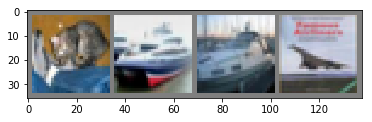

In [16]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [18]:
outputs = cnn_model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %
